# Q1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
## Calculate the distance from each point to the 4 centroids.
# cen is a matrix about 4 centroids
# k is the number of group
def distance(data, cen, k):
    dis_total = []                # Set an empty list to store all the results.
    
    for num in data:
        temp = []                 # Set an empty list to store the distances from one point to the 4 centroids.
        
        for i in range(len(cen)):
            dis = (num[0]-cen[i][0])**2 + (num[1]-cen[i][1])**2
            temp.append(dis)
            
        dis_total.append(temp)    # Store a group of 4 into a list.
        
    return dis_total

In [3]:
# Divide the point into the group where the nearest centroid is located.
def group(data, cen, k):
    dis_total = distance(data, cen, k)
      
    G = []
    for i in range(k):                             # Set 4 empty lists for grouping.
        G.append([])
        
    for i in range(len(dis_total)):
        minimum = min(dis_total[i])                # Select the shortest distance.
        pos = dis_total[i].index(minimum)          # Determine which centroid it is the shortest distance from.
        G[pos].append([data[i][0], data[i][1]])    # Store it in the group where that centroid is located.

    return G

In [4]:
# Compute the new centroids of the 4 new groups generated.
def newCen(data, cen, k):
    G = group(data, cen, k)
    old = cen
    cen = np.zeros((k, 2))                         # Initialize the new centroids, a 4*2 matrix.
       
    for i in range(len(G)):
        for j in range(len(G[i])):
            cen[i][0] += G[i][j][0] / len(G[i])    # Calculate the average value of each group of x-axis.
            cen[i][1] += G[i][j][1] / len(G[i])    # Calculate the average value of each group of y-axis.
            
    return old, cen 

In [5]:
# Plot the data points of each group with different colors
def draw(data, cen, k):
    G = group(data, cen, k)
    col = ['blue', 'red', 'green', 'orange']                   # Set different colors for each group.
    group_label = ['group 1', 'group 2', 'group 3', 'group 4'] # Set different labels for each group.
    
    for i in range(len(G)):        
        for j in range(len(G[i])):
            pic_group = plt.scatter(G[i][j][0], G[i][j][1], c = col[i])
        pic_group.set_label(group_label[i])
        
        # Mark the center of each group.
        pic_center = plt.scatter(cen[i][0], cen[i][1], marker = '*', s = 80, c = 'purple')
        
    pic_center.set_label('centroid')   
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Scatter of data')
    plt.legend()
    plt.show()

In [6]:
# Compute the sum of the squared distances of each data point in a group from its centroid.
def RSS(data, cen, k):
    G = group(data, cen, k)
    RSS_k = []                                     # Set an empty list to store the RSS of each group.
    
    for i in range(len(G)):
        square_dis = 0                             # Initialize the RSS of each group
        
        for j in range(len(G[i])):                 # Calculate the RSS of each group
            square_dis += (G[i][j][0] - cen[i][0])**2 + (G[i][j][1] - cen[i][1])**2
            
        RSS_k.append(square_dis)
        sum_RSS = sum(RSS_k)
    return RSS_k, sum_RSS

In [7]:
# Import data
data = np.loadtxt('data4.txt', delimiter = ',')

In [8]:
# The number of groups
k = 4

In [9]:
# Obtain four random center.
cen = np.array([[-1.7075, -0.5890], [0.9129, 0.0312], [0.3381, 0.6673], [1.5926, 0.2018]])
cen

array([[-1.7075, -0.589 ],
       [ 0.9129,  0.0312],
       [ 0.3381,  0.6673],
       [ 1.5926,  0.2018]])

In [10]:
# Initialize the old centers.
old = np.zeros((k,2))
old

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [11]:
# Initialize interation and set an empty list for interation and sum of RSS_k.
interation = 1
interation_plot = []
sumRss = []

In [12]:
# Set 4 empty lists for RSS.
RSS_plot = []
for i in range(k):                             
    RSS_plot.append([])

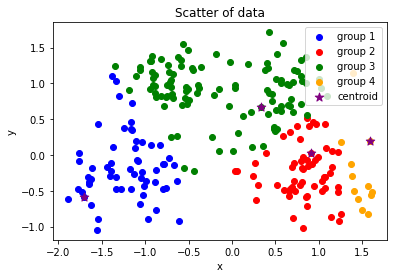

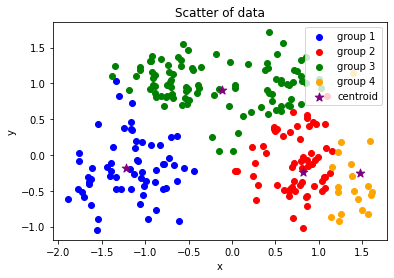

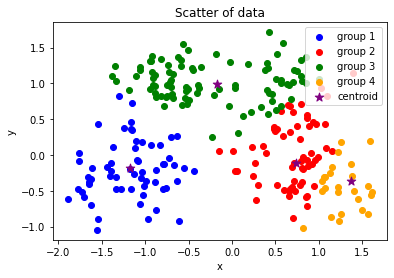

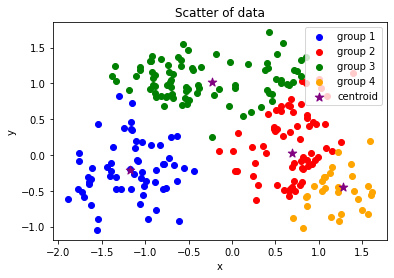

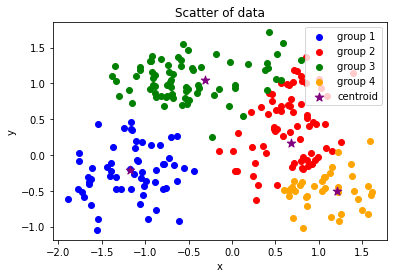

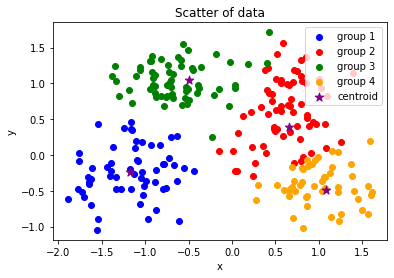

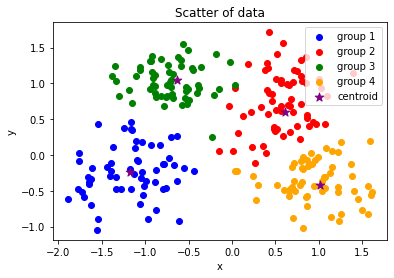

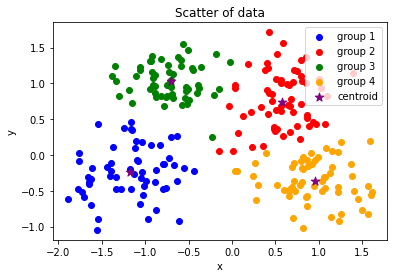

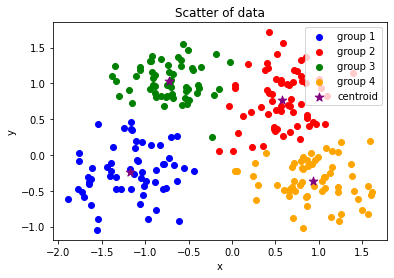

In [13]:
# Repeat the following steps, until the change of centroids less than 1.e−4.
while np.any(abs(cen-old)) > 1.e-4: 
    dis_total = distance(data, cen, k)
    G = group(data, cen, k)
    
    # At each iteration, place the RSS of the four groups on the corresponding positions of the list RSS_plot.
    RSS_k, sum_RSS = RSS(data, cen, k)
    
    for i in range(k):
        RSS_plot[i].append(RSS_k[i])        
    interation_plot.append(interation)
    sumRss.append(sum_RSS)
    
    draw(data, cen, k)
    old, cen = newCen(data, cen, k)
    interation += 1

In [14]:
# Report RSS for each interation
print('For each interation, the RSS is', sumRss)

For each interation, the RSS is [156.0385797, 91.1640813305959, 85.96331637831145, 80.7388997843516, 75.11011866339291, 62.81868857906072, 55.07580647362048, 52.510207802708564, 52.41605142690901]


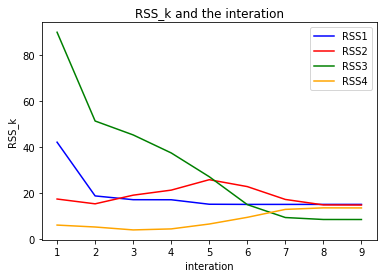

In [15]:
# Set colors and labels for each group.
col = ['blue', 'red', 'green', 'orange']
RSS_label = ['RSS1', 'RSS2', 'RSS3', 'RSS4']

# Plot RSS_k as a function of the iteration number.
for i in range(k):
    p = plt.plot(interation_plot, RSS_plot[i], color = col[i], label = RSS_label[i])

plt.xlabel('interation')
plt.ylabel('RSS_k')
plt.title('RSS_k and the interation')
plt.legend()
plt.show()

As can be seen from the above graph, the RSS gets smaller and smaller as the number of iterations increases, but eventually converges to a certain number.
RSS_1 tend to 17, RSS_2 tend to 17, RSS_3 tend to 7, and RSS_4 tend to 15

In [16]:
# Matrix cen is the mean of each group of x-axis and y-axis.
cen

array([[-1.17465254, -0.23977119],
       [ 0.57153871,  0.77146774],
       [-0.72126552,  1.03061207],
       [ 0.93274426, -0.35742459]])

In [17]:
# Calculate the variance of each group of x-axis and y-axis.
var_x = np.zeros(k)
var_y = np.zeros(k)
for i in range(len(G)):
    for j in range(len(G[i])):
        var_x[i] += (G[i][j][0] - cen[i][0])**2 / (len(G[i]) - 1)
        var_y[i] += (G[i][j][1] - cen[i][1])**2 / (len(G[i]) - 1)   

In [18]:
# Calculate the standart deviation of each group of x-axis.
std_x = np.sqrt(var_x)
std_x

array([0.37029068, 0.30564392, 0.30621974, 0.38182937])

In [19]:
# Calculate the standart deviation of each group of y-axis.
std_y = np.sqrt(var_y)
std_y

array([0.35353612, 0.38884115, 0.24006325, 0.28621244])

In [20]:
# Plot the histogram of each group
def group_hist(data, cen, k, temp):
    x=[]
    y=[]

    for j in range(len(temp)):
        x.append(temp[j][0])                # Collect the x data
        y.append(temp[j][1])                # Collect the y data

    plt.hist(x)
    plt.xlabel('The x data')
    plt.ylabel('Frequency')
    plt.title('The histogram for the x data')
    plt.show()
    
    plt.hist(y)
    plt.xlabel('The y data')
    plt.ylabel('Frequency')
    plt.title('The histogram for the y data')
    plt.show()

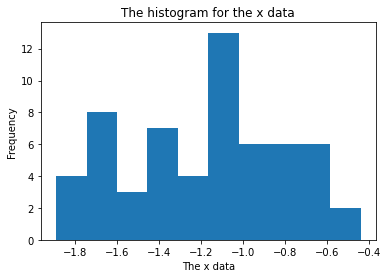

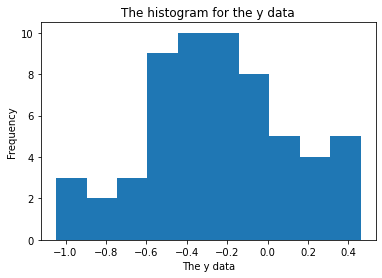

In [21]:
# Plot the histogram of group 1.
group_hist(data, cen, k, G[0])

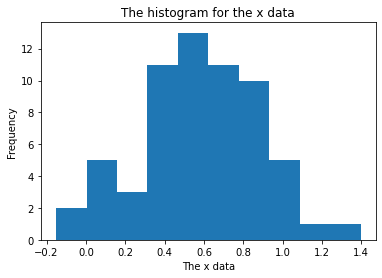

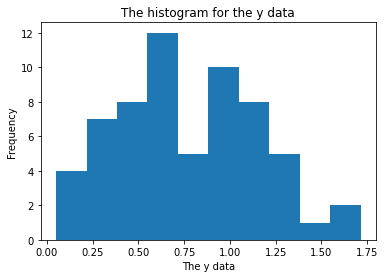

In [22]:
# Plot the histogram of group 2.
group_hist(data, cen, k, G[1])

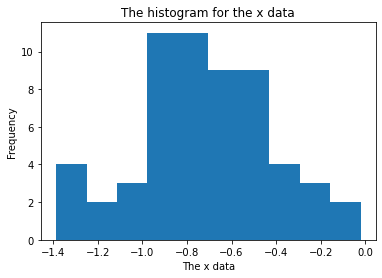

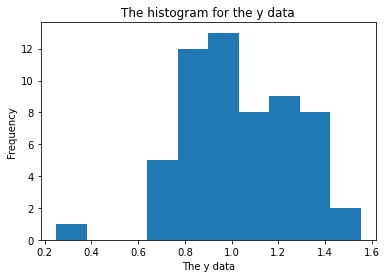

In [23]:
# Plot the histogram of group 3.
group_hist(data, cen, k, G[2])

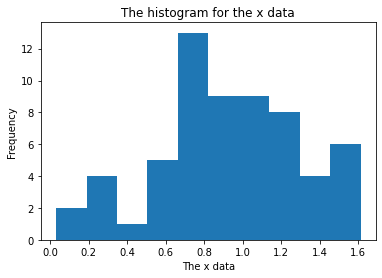

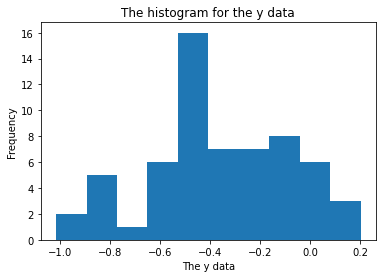

In [24]:
# Plot the histogram of group 4.
group_hist(data, cen, k, G[3])

# Q2

In [25]:
# Import data
iris = pd.read_csv('iris_data.csv')
iris.head()

,petal length,petal width,sepal length,sepal width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [26]:
# Pick up the first 4 columns.
iris_data = np.array(iris[['petal length', 'petal width', 'sepal length', 'sepal width']])

# Pick up the species columns.
species = np.array(iris['species'])

In [27]:
# The number of groups
iris_k = 3

In [28]:
# Calculate the distance from each point to the 3 centroids.
def iris_distance(data, cen, k):
    dis_total = []                # Set an empty list to store all the results.
    
    for num in data:
        temp = []                 # Set an empty list to store the distances from one point to the 3 centroids.
        
        for i in range(len(cen)):
            dis = (num[0]-cen[i][0])**2 + (num[1]-cen[i][1])**2 + (num[2]-cen[i][2])**2 + (num[3]-cen[i][3])**2
            temp.append(dis)
            
        dis_total.append(temp)    # Store a group of 3 into a list.
        
    return dis_total

In [29]:
# Divide the point into the group where the nearest centroid is located.
def iris_group(data, cen, k, species):
    dis_total = iris_distance(data, cen, k)
      
    G = []                                        # Set 3 empty lists for grouping.
    group_species = []                            # Set 3 empty lists for group species.
    for i in range(k):                             
        G.append([])
        group_species.append([])
        
    for i in range(len(dis_total)):
        minimum = min(dis_total[i])                # Select the shortest distance.
        pos = dis_total[i].index(minimum)          # Determine which centroid it is the shortest distance from.
        
        # Store the data point in the group where that centroid is located.
        G[pos].append([data[i][0], data[i][1], data[i][2], data[i][3]]) 
        
        # As the data points are grouped, the species are grouped as well.
        group_species[pos].append(species[i])
        
    return G, group_species

In [30]:
# Compute the new centroids of the k new groups generated.
def iris_newCen(data, cen, k):
    G, group_species = iris_group(data, cen, k, species)
    old = cen
    cen = np.zeros((k, 4))                         # Initialize the new centroids, a k*4 matrix.
       
    for i in range(len(G)):
        for j in range(len(G[i])):
            cen[i][0] += G[i][j][0] / len(G[i])    # Calculate the average value of each group of petal length.
            cen[i][1] += G[i][j][1] / len(G[i])    # Calculate the average value of each group of petal width.
            cen[i][2] += G[i][j][2] / len(G[i])    # Calculate the average value of each group of sepal length.
            cen[i][3] += G[i][j][3] / len(G[i])    # Calculate the average value of each group of sepal width.
            
    return old, cen 

In [31]:
# Obtain 3 random center.
new_cen = np.array([[5, 3.4, 1.5, 0.2], [6, 3.4, 4.5, 1.6], [7.7, 2.8, 6.7, 2]])
new_cen

array([[5. , 3.4, 1.5, 0.2],
       [6. , 3.4, 4.5, 1.6],
       [7.7, 2.8, 6.7, 2. ]])

In [32]:
# Initialize the old centers.
old_cen = np.zeros((iris_k, 4))
old_cen

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [33]:
# Repeat the following steps, until the change of centroids less than 1.e−4.
while np.any(abs(new_cen - old_cen)) > 1.e-4:     
    iris_total_dis = iris_distance(iris_data, new_cen, iris_k)
    iris_G, group_species = iris_group(iris_data, new_cen, iris_k, species)
    old_cen, new_cen = iris_newCen(iris_data, new_cen, iris_k)

In [34]:
# Number of data points in group 1.
len(iris_G[0])

50

In [35]:
# Number of data points in group 2.
len(iris_G[1])

62

In [36]:
# Number of data points in group 3.
len(iris_G[2])

38

From the number of data points in each group above, there are misclassified data points in the group 2 and group 3. 

In [37]:
# Calculate the mean of group 3.
mean_group3 = new_cen[2]
mean_group3

array([6.85      , 3.07368421, 5.74210526, 2.07105263])

In [38]:
# Calculate the variance of group 3.
variance = np.zeros(4)
for i in range(len(iris_G[2])):
    variance[0] += (iris_G[2][i][0] - mean_group3[0])**2 / (len(iris_G[2]) - 1)
    variance[1] += (iris_G[2][i][1] - mean_group3[1])**2 / (len(iris_G[2]) - 1)
    variance[2] += (iris_G[2][i][2] - mean_group3[2])**2 / (len(iris_G[2]) - 1)
    variance[3] += (iris_G[2][i][3] - mean_group3[3])**2 / (len(iris_G[2]) - 1)
variance  

array([0.24418919, 0.08415363, 0.23871977, 0.07832859])

In [39]:
# Calculate the standard deviation of group 3.
std_group3 = np.sqrt(variance)
std_group3

array([0.49415503, 0.29009245, 0.48858957, 0.27987246])

In [40]:
# Labels for each group.
group_species

[['Iris-setosa',
  'Iris-setosa',
  'Iris-setosa',
  'Iris-setosa',
  'Iris-setosa',
  'Iris-setosa',
  'Iris-setosa',
  'Iris-setosa',
  'Iris-setosa',
  'Iris-setosa',
  'Iris-setosa',
  'Iris-setosa',
  'Iris-setosa',
  'Iris-setosa',
  'Iris-setosa',
  'Iris-setosa',
  'Iris-setosa',
  'Iris-setosa',
  'Iris-setosa',
  'Iris-setosa',
  'Iris-setosa',
  'Iris-setosa',
  'Iris-setosa',
  'Iris-setosa',
  'Iris-setosa',
  'Iris-setosa',
  'Iris-setosa',
  'Iris-setosa',
  'Iris-setosa',
  'Iris-setosa',
  'Iris-setosa',
  'Iris-setosa',
  'Iris-setosa',
  'Iris-setosa',
  'Iris-setosa',
  'Iris-setosa',
  'Iris-setosa',
  'Iris-setosa',
  'Iris-setosa',
  'Iris-setosa',
  'Iris-setosa',
  'Iris-setosa',
  'Iris-setosa',
  'Iris-setosa',
  'Iris-setosa',
  'Iris-setosa',
  'Iris-setosa',
  'Iris-setosa',
  'Iris-setosa',
  'Iris-setosa'],
 ['Iris-versicolor',
  'Iris-versicolor',
  'Iris-versicolor',
  'Iris-versicolor',
  'Iris-versicolor',
  'Iris-versicolor',
  'Iris-versicolor',
  

As can be seen from the group_species, the first group is Iris-setosa, the second group is Iris-versicolor, and the third group is Iris-virginica.
Misclassified data points are the last 14 in the second group and the first two data points in the third group.

In [41]:
# Misclassified data points in group 2.
mis_group2 = iris_G[2][-14::]
mis_group2

[[7.9, 3.8, 6.4, 2.0],
 [6.4, 2.8, 5.6, 2.2],
 [6.1, 2.6, 5.6, 1.4],
 [7.7, 3.0, 6.1, 2.3],
 [6.3, 3.4, 5.6, 2.4],
 [6.4, 3.1, 5.5, 1.8],
 [6.9, 3.1, 5.4, 2.1],
 [6.7, 3.1, 5.6, 2.4],
 [6.9, 3.1, 5.1, 2.3],
 [6.8, 3.2, 5.9, 2.3],
 [6.7, 3.3, 5.7, 2.5],
 [6.7, 3.0, 5.2, 2.3],
 [6.5, 3.0, 5.2, 2.0],
 [6.2, 3.4, 5.4, 2.3]]

In [42]:
# Misclassified data points in group 3.
mis_group3 = iris_G[2][:2]
mis_group3

[[6.9, 3.1, 4.9, 1.5], [6.7, 3.0, 5.0, 1.7]]